In [2]:
import pandas as pd

In [3]:
# Wczytanie danych

df_comments = pd.read_csv("Comments.csv")
df_posts = pd.read_csv("Posts.csv")
df_users = pd.read_csv("Users.csv")

<AxesSubplot:>

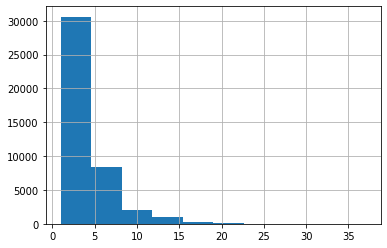

In [136]:
# Zadanie 1

df_comments.groupby("PostId")\
        .count()\
        .rename(columns={"Id":"n_coms"})["n_coms"].hist()

In [42]:
# Zadanie 2

df_users[['DisplayName', 'Views']]\
        .sort_values(by='Views', ascending = False).values[0,0]


'Mark Mayo'

In [91]:
# Zadanie 3

df3 = df_posts[df_posts["PostTypeId"] == 2]
userid = df3[["Id", "OwnerUserId" ]]\
        .groupby("OwnerUserId")\
        .count()\
        .reset_index()\
        .rename(columns={"Id":"count"})\
        .sort_values("count", ascending=False).values[1,0]

df_users[df_users["Id"] == userid ]["DisplayName"].values[0]


'Relaxed'

In [130]:
#Zadanie 4

aa = df_posts[df_posts["PostTypeId"] == 2]
aa = aa[["Id", "ParentId", "Score"]]\
        .rename(columns={"Id":"AA_Id", "Score": "AA_score"})

com = df_comments[[ "PostId", "Score"]]\
        .groupby("PostId")\
        .max()\
        .reset_index()\
        .rename(columns={"Score":"Max_score"})

df4 = aa.merge(com, left_on="ParentId", right_on="PostId")


sum(df4["AA_score"] < df4["Max_score"]) / len(df4["AA_score"])


0.2506420285149216